In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Yelp_Restaurant_Reviews.csv")
df.head()

,Company name,Location,Rating,Review Text
0,sidney dairy barn,sidney,5,All I can say is they have very good ice cream...
1,sidney dairy barn,sidney,4,Nice little local place for ice cream.My favor...
2,sidney dairy barn,sidney,5,A delicious treat on a hot day! Staff was very...
3,sidney dairy barn,sidney,4,This was great service and a fun crew! I got t...
4,sidney dairy barn,sidney,5,This is one of my favorite places to get ice c...


In [31]:
# Extract unique restaurant names and locations
restaurants = df['Company name'].unique()
locations = df['Location'].unique()

location_distribution = df['Location'].value_counts()

for location, count in location_distribution.items():
    restaurants_at_location = df[df['Location'] == location]['Company name'].unique()
    print(f"Restaurants in {location.title()}: {', '.join(restaurants_at_location).title()}")

Restaurants in Las Vegas: Carlos Bakery, Handels Homemade Ice Cream And Yogurt, Bouchon Bakery, Sprinkles Vegas, 85 C Bakery Cafe, Ghirardelli Ice Cream And Chocolate Shop, Milk Bar Vegas, Somisomi, Donut Bar, Sloans Grand Canal Shoppes, La Pasticceria
Restaurants in Charlotte: Amelies French Bakery And Cafe, Jenis Splendid Ice Creams, Villanis Bakery, Ninety S Milkshake Bar, The Batchmaker, Day And Night Exotic Cereal Bar, Matcha Cafe Maiko, The Peach Cobbler Factory
Restaurants in Phoenix: Novel Ice Cream, Melt, Scooptopia, Churn, Mary Coyle
Restaurants in Cleveland: Jack Frost Donuts, Mitchells Homemade Ice Cream Cleveland, Prestis Bakery, Masons Creamery, Honey Hut Ice Cream, Campbells Sweets Factory, Crepes De Luxe
Restaurants in Scottsdale: Sweet Republic, Fatty Daddys
Restaurants in Pittsburgh: The Butterwood Bake Consortium, Pages, Sinful Sweets Chocolate Company, Churn Homemade Ice Cream And Coffee
Restaurants in Champaign: Jarlings Custard Cup, Hopscotch, Paris Super Crepes, 

In [32]:
print(len(restaurants))

49


In [34]:
# Group the restaurant reviews together
restaurant_reviews = df.groupby('Company name')['Review Text'].apply(list).reset_index()
print(restaurant_reviews['Review Text'])

0     [You don't want to spend $60 on brunch out wit...
1     [This is not your regular bakery, this is an e...
2     [Batch has the most consistent quality and bes...
3     [Good to come by for a quick bite and pastries...
4     [I have no idea why this place is $$ when it r...
5     [I lived in Chicago for 20 years, and now live...
6     [First timer!!! It was ok! I think the cake wo...
7     [Visited Chocolate Shoppe during their 60th An...
8     [Great every single time we go! It was hot wai...
9     [This place is soooo cute!!! I was actually wa...
10    [Wow--I didn't realize how poorly people thoug...
11    [Generous portions friendly service and great ...
12    [Hype little ice cream spot. Definitely a vibe...
13    [Best donuts in Vegas. The donuts are balanced...
14    [Cute little spot with a lot of good flavors! ...
15    [I ordered the frozen hot cocoa 10/10!!! Must ...
16    [Looking for what is the BEST ICE CREAM in TOW...
17    [Quick atop at @honey_hut off State Rd Bro

In [35]:
# Preprocess the entries
df['Sentiment'] = df['Rating'].apply(lambda x: 'positive' if x in [4, 5] else 'negative' if x in [1, 2] else 'neutral')
df.head()

,Company name,Location,Rating,Review Text,Sentiment
0,sidney dairy barn,sidney,5,All I can say is they have very good ice cream...,positive
1,sidney dairy barn,sidney,4,Nice little local place for ice cream.My favor...,positive
2,sidney dairy barn,sidney,5,A delicious treat on a hot day! Staff was very...,positive
3,sidney dairy barn,sidney,4,This was great service and a fun crew! I got t...,positive
4,sidney dairy barn,sidney,5,This is one of my favorite places to get ice c...,positive


#### Sentiment

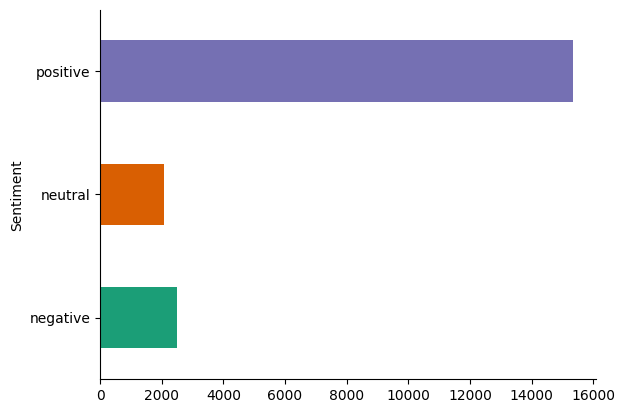

In [37]:
# @title Sentiment

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

#### Rating

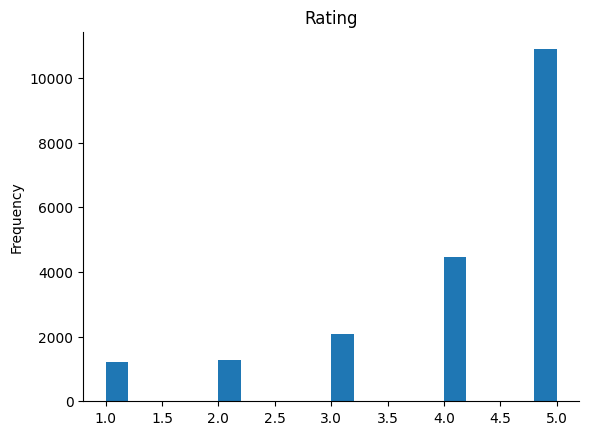

In [38]:
# @title Rating

from matplotlib import pyplot as plt
df['Rating'].plot(kind='hist', bins=20, title='Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

#### Proportion of Positive Reviews by Company

<Axes: xlabel='Company name'>

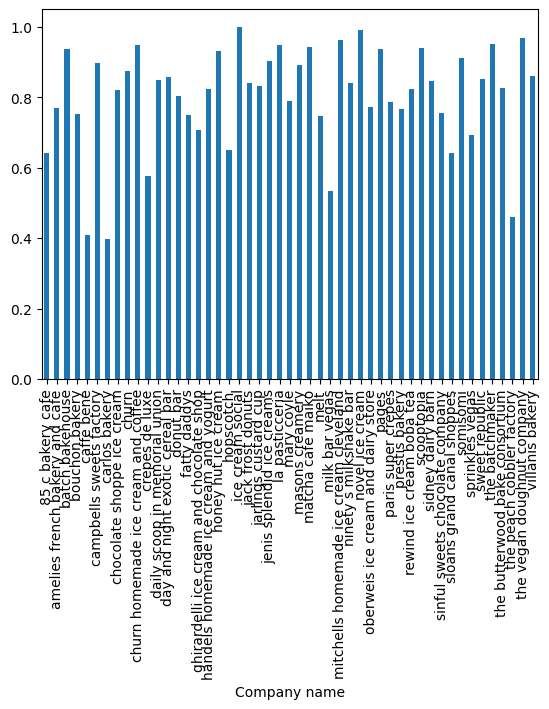

In [39]:
# @title Proportion of Positive Reviews by Company

df.groupby('Company name')['Sentiment'].apply(lambda x: (x == 'positive').mean()).plot(kind='bar')

#### Average rating by location

<Axes: xlabel='Location'>

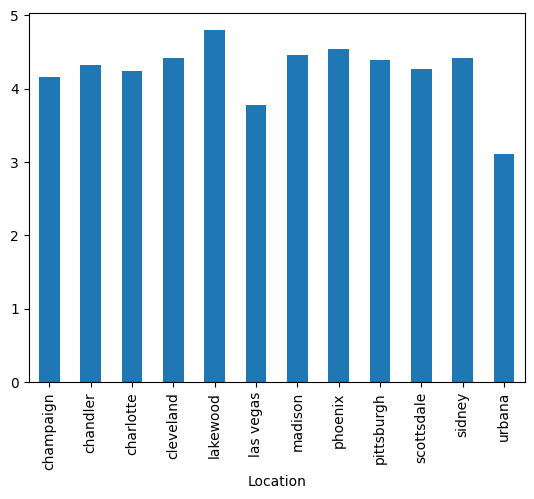

In [40]:
# @title Average rating by location

df.groupby('Location')['Rating'].mean().plot(kind='bar')

#### Sentiment vs Rating

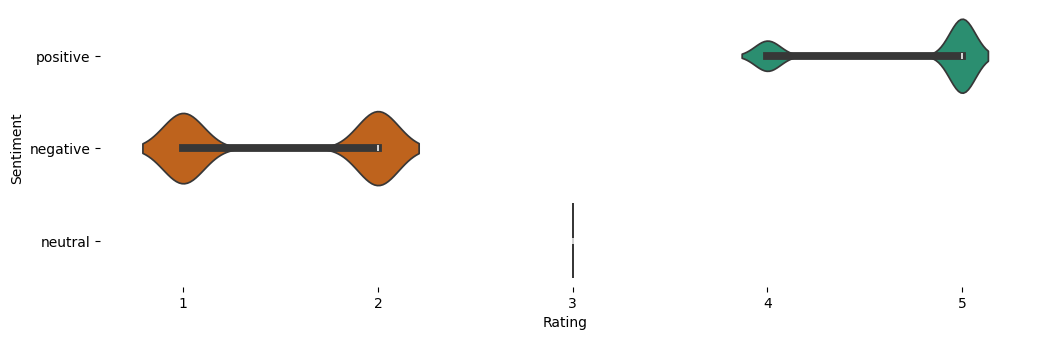

In [41]:
# @title Sentiment vs Rating

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Sentiment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Rating', y='Sentiment', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [42]:
from transformers import Trainer, TrainingArguments, pipeline, AutoTokenizer, AutoModelForSequenceClassification
from sklearn.model_selection import train_test_split
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

In [43]:
# Split the data into training and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=40)

In [44]:
# Load the tokenizer and the model
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')
# Define model and training arguments
model = AutoModelForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=3) # binary classification

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [45]:
# Tokenize the text and add special tokens
def tokenize_text(text):
    return tokenizer(text, padding=True, truncation=True)

train_df['tokenized'] = train_df['Review Text'].apply(tokenize_text)
test_df['tokenized'] = test_df['Review Text'].apply(tokenize_text)
train_df.head()

,Company name,Location,Rating,Review Text,Sentiment,tokenized
6020,bouchon bakery,las vegas,5,I absolutely LOVE their french macarons. I hav...,positive,"[input_ids, attention_mask]"
3518,amelies french bakery and cafe,charlotte,3,As there are not many bakeries in Charlotte (s...,neutral,"[input_ids, attention_mask]"
18933,the batchmaker,charlotte,4,Took a trip from NYC to Charlotte to visit fri...,positive,"[input_ids, attention_mask]"
17227,donut bar,las vegas,5,If you have an addictive personality stay away...,positive,"[input_ids, attention_mask]"
9174,fatty daddys,scottsdale,4,Enjoyed the ice cream; some cool flavors and s...,positive,"[input_ids, attention_mask]"


In [14]:
training_args = TrainingArguments(
    output_dir="./results",          # output directory
    num_train_epochs=3,              # number of training epochs
    per_device_train_batch_size=24,   # batch size per device during training
    per_device_eval_batch_size=32,   # batch size for evaluation
    warmup_steps=500,                # Number of warm steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir="./logs",            # directory for storing logs
    logging_steps=10           
)

In [118]:
from torch.utils.data import Dataset

class ReviewsDataset(Dataset):
    def __init__(self, dataframe):
        self.data = dataframe

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        item = self.data.iloc[idx]
        # Assuming the 'tokenized' column contains a dictionary with 'input_ids' and 'attention_mask'
        input_ids = item['tokenized']['input_ids']
        attention_mask = item['tokenized']['attention_mask']
        # labels = 1 if item['Sentiment'] == 'positive' else 0 # Binary classficaton: positive = 1, negative = 0
        if item['Sentiment'] == 'positive':
            labels = 2
        elif item['Sentiment'] == 'neutral':
            labels = 1
        else:
            labels = 0
            
        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'labels': labels
        }

train_dataset = ReviewsDataset(train_df)
test_dataset = ReviewsDataset(test_df)

In [21]:
# Create and use the Trainer
from transformers import DataCollatorWithPadding

# Instantiate a data collator that will dynamically pad the batches during training
data_collator = DataCollatorWithPadding(tokenizer, return_tensors="pt")

In [46]:
import numpy as np
from datasets import load_metric

def compute_metrics(eval_pred):
    load_accuracy = load_metric("accuracy")
    load_f1 = load_metric("f1")

    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = load_accuracy.compute(predictions=predictions, references=labels)["accuracy"]
    f1 = load_f1.compute(predictions=predictions, references=labels, average='weighted')["f1"]
    return {"accuracy": accuracy, "f1": f1}

In [47]:
import pickle

# Create a Trainer instance with the data collator
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

# Train the model
trainer.train()

with open('trained_transformer_model_CPU.pkl', 'wb') as f:
    pickle.dump(trainer.model, f)

# Evaluate the model
eval_results = trainer.evaluate()
print(eval_results)

Step,Training Loss
10,1.125400
20,1.102900
30,1.056100
40,0.975600
50,0.861200
60,0.789000
70,0.649100
80,0.722800
90,0.645900
100,0.640700


{'eval_loss': 0.3655862808227539, 'eval_accuracy': 0.8881909547738693, 'eval_f1': 0.888641596504324, 'eval_runtime': 485.0552, 'eval_samples_per_second': 8.205, 'eval_steps_per_second': 0.258, 'epoch': 3.0}


In [55]:
# Load the pretrained model from the pickle file so that retraining it from scratch is not necessary
model = pickle.load(open('trained_transformer_model_CPU.pkl', 'rb'))

In [63]:
# Load the training arguments, test dataset, and the data collator and metrics computation function if needed
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=3,              # number of training epochs
    per_device_eval_batch_size=64,   # batch size for evaluation
)

# Create a Trainer instance
trainer = Trainer(
    model=model,
    args=training_args,
    eval_dataset=test_dataset,    # make sure test_dataset is loaded or defined
    data_collator=data_collator,  # ensure data_collator is defined if it was used initially
    compute_metrics=compute_metrics  # ensure compute_metrics is defined if it was used initially
)

eval_results = trainer.evaluate()
print(eval_results)


{'eval_loss': 0.3655862808227539, 'eval_accuracy': 0.8881909547738693, 'eval_f1': 0.888641596504324, 'eval_runtime': 749.6408, 'eval_samples_per_second': 5.309, 'eval_steps_per_second': 0.084}


### Compile the dictionaries

In [50]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Function to map polarity score to a rating
def map_score_to_rating(score):
    if score <= -0.2:
        return 1
    elif score <= 0.4:
        return 2
    elif score <= 0.8:
        return 3
    elif score <= 0.9:
        return 4
    else:
        return 5

# Instantiate the SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Calculate the polarity score of every review in the dataset
df['Polarity_Score'] = df['Review Text'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Map the polarity score to a rating on a scale of 1-5
df['Calculated_Rating'] = df['Polarity_Score'].apply(map_score_to_rating)

df.head()

,Company name,Location,Rating,Review Text,Sentiment,Polarity_Score,Calculated_Rating
0,sidney dairy barn,sidney,5,All I can say is they have very good ice cream...,positive,0.8803,4
1,sidney dairy barn,sidney,4,Nice little local place for ice cream.My favor...,positive,0.9509,5
2,sidney dairy barn,sidney,5,A delicious treat on a hot day! Staff was very...,positive,0.8803,4
3,sidney dairy barn,sidney,4,This was great service and a fun crew! I got t...,positive,0.9400,5
4,sidney dairy barn,sidney,5,This is one of my favorite places to get ice c...,positive,0.9924,5


In [51]:
import pprint

# Create a dictionary where the key is the restaurant name and the value is the location
restaurant_location_dict = {name: location for name, location in zip(df['Company name'], df['Location'])}
restaurant_location_dict

{'sidney dairy barn': 'sidney',
 'rewind ice cream boba tea': 'chandler',
 'carlos bakery': 'las vegas',
 'the vegan doughnut company': 'lakewood',
 'the butterwood bake consortium': 'pittsburgh',
 'handels homemade ice cream and yogurt': 'las vegas',
 'amelies french bakery and cafe': 'charlotte',
 'bouchon bakery': 'las vegas',
 'novel ice cream': 'phoenix',
 'sweet republic': 'scottsdale',
 'sprinkles vegas': 'las vegas',
 'fatty daddys': 'scottsdale',
 '85 c bakery cafe': 'las vegas',
 'melt': 'phoenix',
 'jack frost donuts': 'cleveland',
 'jenis splendid ice creams': 'charlotte',
 'mitchells homemade ice cream cleveland': 'cleveland',
 'prestis bakery': 'cleveland',
 'villanis bakery': 'charlotte',
 'batch bakehouse': 'madison',
 'chocolate shoppe ice cream': 'madison',
 'ghirardelli ice cream and chocolate shop': 'las vegas',
 'milk bar vegas': 'las vegas',
 'jarlings custard cup': 'champaign',
 'somisomi': 'las vegas',
 'scooptopia': 'phoenix',
 'churn': 'phoenix',
 'donut bar':

In [108]:
# Group by 'Company name' and get the top 5 reviews for each group
top_reviews = df.groupby('Company name').apply(lambda x: x.nlargest(5, 'Polarity_Score')).reset_index(drop=True)
top_reviews_for_restaurant = top_reviews.groupby('Company name')['Review Text'].apply(list).reset_index()
reviews_dict = top_reviews_for_restaurant.set_index('Company name')['Review Text'].to_dict()
pprint.pprint(reviews_dict)

{'85 c bakery cafe': ['85 degrees is always a good spot to curb any of your '
                      'doughy sweet bun cravings. This location is hard to '
                      'beat, situated in the heart of Spring Mountain is a '
                      'newly developed plaza. Inside is clean, organized and '
                      'spacious...I could only wish the full establishment was '
                      'open to experience. Of course, because of our friend '
                      'COVID, all the buns are individually packaged which is '
                      'not the same experience we are normally used to. For '
                      'going towards the closing minutes, there was still '
                      'plenty of buns to choose from. And with that said let '
                      'me tell you which ones I picked... Strawberry Cream '
                      'Tart (3.5/5) - The tart was a good size, just that '
                      'perfect mouthful. Simple enough to curb y

In [109]:
# Aggregate the Calculated_Ratings for every restaurant to get the mean Calculated_Rating
mean_scores = df.groupby('Company name')['Calculated_Rating'].mean().reset_index()
scores_dict = mean_scores.set_index('Company name')['Calculated_Rating'].to_dict()
pprint.pprint(scores_dict)

{'85 c bakery cafe': 3.737704918032787,
 'amelies french bakery and cafe': 4.066111655239961,
 'batch bakehouse': 4.273170731707317,
 'bouchon bakery': 3.9314574314574315,
 'caffe bene': 3.732394366197183,
 'campbells sweets factory': 4.430379746835443,
 'carlos bakery': 3.3868217054263567,
 'chocolate shoppe ice cream': 3.8980891719745223,
 'churn': 4.337110481586402,
 'churn homemade ice cream and coffee': 4.473684210526316,
 'crepes de luxe': 3.5176470588235293,
 'daily scoop in memorial union': 4.029850746268656,
 'day and night exotic cereal bar': 4.23943661971831,
 'donut bar': 4.22265625,
 'fatty daddys': 4.112054329371817,
 'ghirardelli ice cream and chocolate shop': 3.8466666666666667,
 'handels homemade ice cream and yogurt': 3.9736456808199123,
 'honey hut ice cream': 4.152671755725191,
 'hopscotch': 4.257731958762887,
 'ice cream social': 4.884615384615385,
 'jack frost donuts': 4.033980582524272,
 'jarlings custard cup': 3.8833333333333333,
 'jenis splendid ice creams': 4.

In [122]:
top_reviews.head(5)

,Company name,Location,Rating,Review Text,Sentiment,tokenized
0,85 c bakery cafe,las vegas,5,85 degrees is always a good spot to curb any o...,positive,"[input_ids, attention_mask]"
1,85 c bakery cafe,las vegas,5,Life looks wonderful and beautiful through ano...,positive,"[input_ids, attention_mask]"
2,85 c bakery cafe,las vegas,4,Stopped by on 1/21 as it was near a place I wa...,positive,"[input_ids, attention_mask]"
3,85 c bakery cafe,las vegas,4,So this is one I've been waiting for and I am ...,positive,"[input_ids, attention_mask]"
4,85 c bakery cafe,las vegas,4,I've been wanting to check out this place for ...,positive,"[input_ids, attention_mask]"


In [113]:
top_reviews["Calculated_Rating"].unique()

array([5])

In [114]:
def new_senti(x):
    if x <= 5 or x >= 4:
        return 'positive'
    else:
        return 'neutral'
        
    
top_reviews['Calculated_Senti_Score'] = top_reviews['Calculated_Rating'].apply(new_senti)

In [119]:
top_reviews.drop(['Polarity_Score', 'Calculated_Rating','Sentiment'], axis=1, inplace=True)

In [120]:
top_reviews.rename(columns={'Calculated_Senti_Score': 'Sentiment'}, inplace=True)

In [121]:
top_reviews['tokenized'] = top_reviews['Review Text'].apply(tokenize_text)
# top_reviews.drop(['Polarity_Score', 'Calculated_Rating'], axis=1, inplace=True)
reviews_dataset = ReviewsDataset(top_reviews)
y_pred = trainer.predict(reviews_dataset)
type(y_pred)

transformers.trainer_utils.PredictionOutput

In [69]:
y_pred_final = y_pred[1]

In [123]:
reviews_dataset.data

,Company name,Location,Rating,Review Text,Sentiment,tokenized
0,85 c bakery cafe,las vegas,5,85 degrees is always a good spot to curb any o...,positive,"[input_ids, attention_mask]"
1,85 c bakery cafe,las vegas,5,Life looks wonderful and beautiful through ano...,positive,"[input_ids, attention_mask]"
2,85 c bakery cafe,las vegas,4,Stopped by on 1/21 as it was near a place I wa...,positive,"[input_ids, attention_mask]"
3,85 c bakery cafe,las vegas,4,So this is one I've been waiting for and I am ...,positive,"[input_ids, attention_mask]"
4,85 c bakery cafe,las vegas,4,I've been wanting to check out this place for ...,positive,"[input_ids, attention_mask]"
...,...,...,...,...,...,...
240,villanis bakery,charlotte,5,"Behold the almighty. If you know, you know. I'...",positive,"[input_ids, attention_mask]"
241,villanis bakery,charlotte,4,I have been waiting to try this place since mo...,positive,"[input_ids, attention_mask]"
242,villanis bakery,charlotte,5,You've probably heard of places to die for so ...,positive,"[input_ids, attention_mask]"
243,villanis bakery,charlotte,5,"YUM , Let me start off by reminding reviewers ...",positive,"[input_ids, attention_mask]"


In [107]:
# These are the examples of recommended reviews where the sentiment is negative
reviews_dataset.data[reviews_dataset.data['Sentiment'] == 'negative']

,Company name,Location,Rating,Review Text,Sentiment,tokenized
24,caffe bene,urbana,2,"Caffe Bene is a place I really want to like, b...",negative,"[input_ids, attention_mask]"
161,oberweis ice cream and dairy store,champaign,1,The place is clean and the staff were friendly...,negative,"[input_ids, attention_mask]"
225,the butterwood bake consortium,pittsburgh,2,"My original review of this place is below, whi...",negative,"[input_ids, attention_mask]"
234,the peach cobbler factory,charlotte,1,Ignoring all the comments about the location (...,negative,"[input_ids, attention_mask]"


In [124]:
# This function is meant for mapping sentiments to labels
def complex_function(x):
    if x == 'positive':
        return 2
    elif x == 'neutral':
        return 1
    else:
        return 0

In [125]:
label = reviews_dataset.data['Sentiment'].apply(complex_function)

In [126]:
# Converting the labels to a list instead of a Dataframe
y_test = list(label)

In [127]:
# Calculating the accuracy of the predicted values from the transformer model to the actual values of the recommendation system
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_final)

0.9102040816326531

In [134]:
# Calculating the precision, recall and f1 score of the predicted values from the transformer model to the actual values of the recommendation system
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred_final, average='weighted')

(1.0, 0.9102040816326531, 0.952991452991453, None)

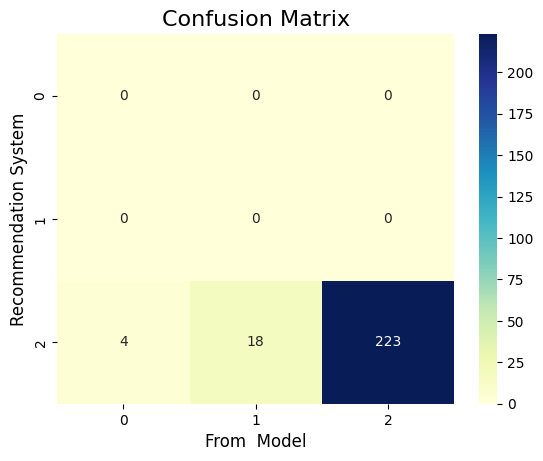

In [132]:
from sklearn.metrics import confusion_matrix
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred_final,labels = [0,1,2])

# Plot the confusion matrix
sns.heatmap(cm, annot=True,fmt='d', cmap='YlGnBu')
plt.xlabel('From  Model',fontsize=12)
plt.ylabel('Recommendation System',fontsize=12)
plt.title('Confusion Matrix',fontsize=16)
plt.show()

In the above confusion matrix, we can see that our recommendation system (which uses the SentimentIntensityAnalyzer) shows all the recommended reviews as positive but after evaluating the top reviews by the trained transformer model, some of the recommended reviews were actually classified as 'neutral' and 'negative'. This matrix was created to analyze the actual recommendation system with the sentiments analyzed by our trained transformer model.

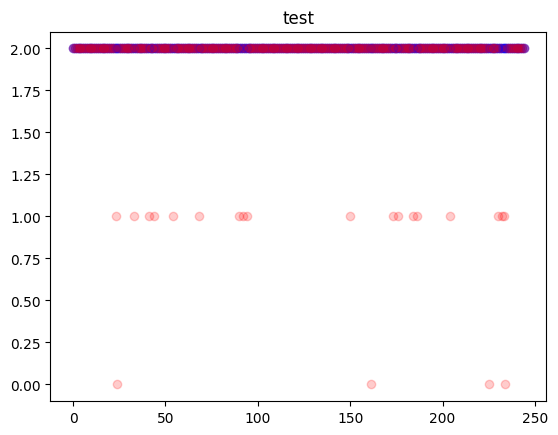

In [130]:
import matplotlib.pyplot as plt
import numpy as np


def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(range(len(y_test)), y_test, color='blue',alpha=0.5)
    plt.scatter(range(len(y_pred)), y_pred, color='red',alpha = 0.2)
    plt.title(regressorName)
    plt.show()
    return




plotGraph(y_test, y_pred_final, "test")

The above graph is the representation of the sentiments from the Transformer model and the Recommendation system.
#### Observations
    - the darker color reperesents that the recommendation system and the model results are mapped.
    - the light color at scale of 1 and 0 say that our Transformer model is predicting the sentiments which do not exist in recommendation system.

In [36]:
restaurants = []
import pickle
import json

with open('food_recommendations.pkl', 'rb') as f:
    food_recommendations = pickle.load(f)

for name, rating in scores_dict.items():
    location = restaurant_location_dict[name]
    reviews = reviews_dict[name]
    foods = food_recommendations[name]
    restaurants.append({
        'name': name,
        'location': location,
        'rating': rating,
        'reviews': reviews,
        'foods': foods
    })

pprint.pprint(restaurants)

with open('restaurants.json', 'w') as json_file:
    json.dump(restaurants, json_file, indent=4)

[{'foods': ['chocolate bun',
            'egg tarts',
            'tiramisu cake',
            'spicy sausage',
            'cheese dog',
            'chocolate roll',
            'milk coffee',
            'elote bread',
            'Sea salt coffee',
            'rose milk tea',
            'milk pudding tart',
            'sea salt jasmine iced tea',
            'matcha cake roll',
            'tiger boba latte',
            'thai tea',
            'milk tea',
            'iced coffee',
            'chocolate mousse',
            'red velvet',
            'strawberry cream bun',
            'elote bun',
            'chocolate paste'],
  'location': 'las vegas',
  'name': '85 c bakery cafe',
  'rating': 3.737704918032787,
  'reviews': ['85 degrees is always a good spot to curb any of your doughy '
              'sweet bun cravings. This location is hard to beat, situated in '
              'the heart of Spring Mountain is a newly developed plaza. Inside '
              'is clean, org

### Perform Named Entity Recognition to identify foods to try at each restaurant

In [29]:
from transformers import pipeline, AutoTokenizer, AutoModelForTokenClassification
import pandas as pd 
from collections import defaultdict
import pprint

tokenizer = AutoTokenizer.from_pretrained("Dizex/InstaFoodRoBERTa-NER")
model = AutoModelForTokenClassification.from_pretrained("Dizex/InstaFoodRoBERTa-NER")

# Load the NER pipeline
ner = pipeline("ner", model=model, tokenizer=tokenizer)

# Load the sentiment analysis pipeline
sentiment_analysis = pipeline("sentiment-analysis", model='distilbert-base-uncased-finetuned-sst-2-english')

def convert_entities_to_list(text, entities: [dict]) -> [str]:
        ents = []
        for ent in entities:
            e = {"start": ent["start"], "end": ent["end"], "label": ent["entity_group"]}
            if ents and -1 <= ent["start"] - ents[-1]["end"] <= 1 and ents[-1]["label"] == e["label"]:
                ents[-1]["end"] = e["end"]
                continue
            ents.append(e)

        return [text[e["start"]:e["end"]] for e in ents]

restaurant_foods_to_try = defaultdict(list)

for index, row in restaurant_reviews.iterrows():
    # Get the restaurant name and the list of reviews for the restaurant
    restaurant_name = row['Company name']
    reviews = row['Review Text']

    # Perform 